In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch
from torchvision import models, transforms
import shap
import os
from PIL import Image

args = {
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    'batch_size': 64,
    # 'test_batch_size': 1000,
    'epochs': 20,
    'lr': 1e-4
}

# model_urls = {"resnet34":"https://download.pytorch.org/models/resnet34-b627a593.pth"}
# # model = models.resnet34(pretrained = True).to(args["device"])
# model = models.vgg16(pretrained = True)
# model.eval()
# print(model)
model_urls = {"resnet34":"https://download.pytorch.org/models/resnet34-b627a593.pth"}
model = models.resnet34(pretrained = True)
model.eval()
print(model)

/home/users/lqa/miniconda3/envs/DataScience/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [2]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def normalize(image):
    if image.max() > 1:
        image = image / 255
    image = (image - mean) / std
    # in addition, roll the axis so that they suit pytorch
    return torch.tensor(image.swapaxes(-1, 1).swapaxes(2, 3)).float()

In [3]:
image = Image.open("./dataset/cat_dog.jpg")

trans = transforms.Compose([
    transforms.Resize((224, 224))
])
image = trans(image)
image = transforms.Resize((224, 224))(image)
image = np.array(image).astype(np.float32)[np.newaxis, :] / 255
print(image)

# image = normalize(image)
# print(image)

e = shap.GradientExplainer((model, model.layer1[1].conv2), normalize(image))
shap_values,indexes = e.shap_values(normalize(image), nsamples=200, output_rank_order = "custom", ranked_outputs = np.array([242, 282]))
# shap_values,indexes = e.shap_values(normalize(image), ranked_outputs=2, nsamples=200)

shap_values = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values]
class_labels = np.arange(0, 1000)[indexes]
shap.image_plot(shap_values, image, class_labels)

[[[[0.60784316 0.53333336 0.4392157 ]
   [0.57254905 0.5254902  0.42352942]
   [0.57254905 0.5137255  0.4117647 ]
   ...
   [0.03921569 0.04313726 0.02352941]
   [0.07058824 0.06666667 0.04705882]
   [0.10196079 0.07843138 0.05490196]]

  [[0.6117647  0.5372549  0.45882353]
   [0.5882353  0.53333336 0.4392157 ]
   [0.5764706  0.5176471  0.42352942]
   ...
   [0.04313726 0.04705882 0.02745098]
   [0.07058824 0.0627451  0.04313726]
   [0.12156863 0.09803922 0.07450981]]

  [[0.6156863  0.54509807 0.46666667]
   [0.59607846 0.53333336 0.44705883]
   [0.5764706  0.52156866 0.42745098]
   ...
   [0.04313726 0.04313726 0.02745098]
   [0.08235294 0.07843138 0.05882353]
   [0.14117648 0.11764706 0.09411765]]

  ...

  [[0.8784314  0.81960785 0.68235296]
   [0.69803923 0.6313726  0.4745098 ]
   [0.5921569  0.49803922 0.38039216]
   ...
   [0.4627451  0.4117647  0.35686275]
   [0.44705883 0.3882353  0.34117648]
   [0.44705883 0.39607844 0.3372549 ]]

  [[0.94509804 0.88235295 0.7921569 ]
   [0.9

AssertionError: output_rank_order must be max, min, or max_abs!

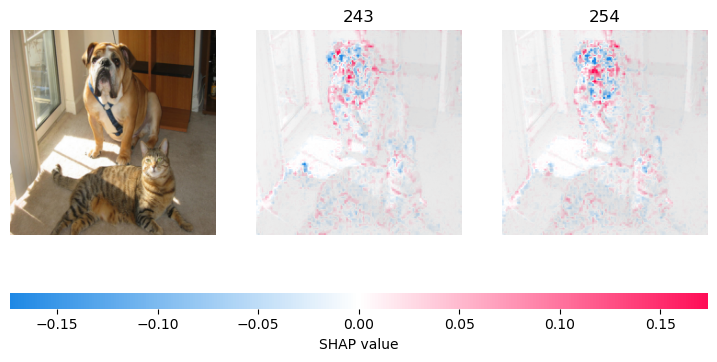

In [26]:

class_labels = np.arange(0,1000)[indexes]
shap.image_plot(shap_values, image, class_labels)